In [6]:
import re
import keras
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
MODEL_FILE = 'out/models/j-e29-l0.63379.hdf5'
MSGS_DIR = 'out/msgs'
IMG_SHAPE = (16, 16, 48)

In [3]:
test_files = pd.read_csv('sample_submission.csv').File.values
model = keras.models.load_model(MODEL_FILE)

In [4]:
def process_batch(files, msgs, model, res_df=None):
    msgs = np.array(msgs, dtype=np.float32).reshape((-1,) + IMG_SHAPE)
    y_p = model.predict(msgs, verbose=True, batch_size=8)
    batch_df = pd.DataFrame({'File': files, 'Class': y_p.T[0]})

    if res_df is None:
        return batch_df
    else:
        return res_df.append(batch_df)

In [5]:
BATCH_SIZE = 50000
batch_files = []
batch_msgs = []
res_df = None

for f in tqdm(test_files):
    
    fid = re.findall(r'(.+)\.mat$', f)[0]
    batch_files.append(f)
    
    # read wave
    msgs_f = MSGS_DIR + '/' + fid + '.npy'
    msg = np.load(msgs_f)
    # move channel axis
#     msg = np.swapaxes(msg, 0, 1)
#     msg = np.swapaxes(msg, 1, 2)
    batch_msgs.append(msg)
    
    if len(batch_files) == BATCH_SIZE:
        break
        res_df = process_batch(batch_files, batch_msgs, model, res_df)
        batch_files = []
        batch_msgs = []

if len(batch_files):
    res_df = process_batch(batch_files, batch_msgs, model, res_df)

  0%|          | 0/6126 [00:00<?, ?it/s]


ValueError: total size of new array must be unchanged

In [13]:
res_df.to_csv('subm-h.csv', index=False, columns=['File', 'Class'], float_format='%.8f')

(array([ 6046.,    80.]),
 array([ 0.07111388,  0.07135406,  0.07159423]),
 <a list of 2 Patch objects>)

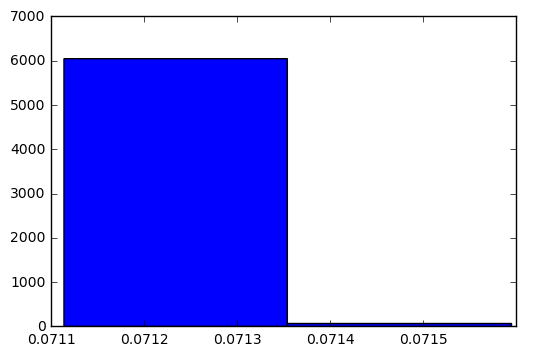

In [14]:
plt.hist(res_df.Class.values, bins=2)